### Интеллектуальные системы, МТУСИ

#### Лабораторная работа 3

#### Выполнил :   Семенов А.И.

#### Группа:   ЗМБД2032

### 1、Import tensorflow and use tensorflow to define a constant.

In [3]:
import tensorflow as tf

# определим константу не изменяемый объект tensorflow
a = tf.constant((1))

<tf.Tensor: shape=(), dtype=int32, numpy=1>

### 2、Use tensorflow to print 'Welcome to Huawei'.

In [13]:
tf.print("Welcom to Huawei")

Welcom to Huawei


### 3、Use tensorflow to define two numeric constants,then calculate them and print the result.

In [6]:
a = tf.constant((99))
b = tf.constant((101))

# суммирвоание двух элементов
summ = tf.add(a, b)

# поээлементное вычитание
sub = tf.subtract(a, b)

# поэлементное поумножение
mul = tf.multiply(a, b)

print(summ, sub, mul, sep="\n\n")

tf.Tensor(200, shape=(), dtype=int32)

tf.Tensor(-2, shape=(), dtype=int32)

tf.Tensor(9999, shape=(), dtype=int32)


### 4、Randomly generate two matrices using tensorflow, calculate and print the result of their multiplication.

In [12]:
# создаём два рандомных тензора
m1 = tf.random.uniform(shape=(5,5))
m2 = tf.random.uniform(shape=(5,5))

# поэлементное умножение 
mul = tf.multiply(m1, m2)

print(m1 , m2 , mul, sep="\n\n")

tf.Tensor(
[[0.42807722 0.91979337 0.00341403 0.6038108  0.07613647]
 [0.7046541  0.11620831 0.30488586 0.24092042 0.8126371 ]
 [0.26759815 0.7102696  0.88526    0.4318354  0.14802003]
 [0.5068618  0.6124631  0.8144386  0.3047055  0.36973286]
 [0.08235705 0.6889653  0.98445857 0.3900634  0.69066787]], shape=(5, 5), dtype=float32)

tf.Tensor(
[[0.7879926  0.64187455 0.54418004 0.82562065 0.3143654 ]
 [0.24928379 0.56802905 0.74859536 0.12356091 0.59280133]
 [0.9969219  0.08905613 0.8364558  0.8546679  0.4016813 ]
 [0.2795682  0.9496794  0.5491767  0.1272496  0.99870384]
 [0.40686035 0.45352972 0.2512908  0.7305695  0.41577768]], shape=(5, 5), dtype=float32)

tf.Tensor(
[[0.33732167 0.59039193 0.00185785 0.49851865 0.02393467]
 [0.17565885 0.0660097  0.22823614 0.02976835 0.48173234]
 [0.26677445 0.06325386 0.74048084 0.36907586 0.05945688]
 [0.14170244 0.5816436  0.4472707  0.03877365 0.36925364]
 [0.03350782 0.31246623 0.24738538 0.2849684  0.2871643 ]], shape=(5, 5), dtype=float32)


### 5、Try to use your own handwriting number to do image recognition

In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# загружаем данные 
mnist = tf.keras.datasets.mnist

# делим данные на выборки
(x_train, y_train), (x_test, y_test) = mnist.load_data()

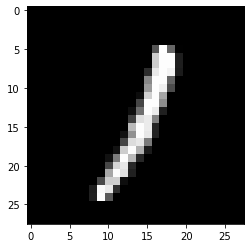

In [25]:
# визуализируем данные 
plt.imshow(x_train[99], cmap="gray")
plt.show()

In [26]:
# необходимо нормализовать данные характеризующие пиксели 
x_train = x_train / 255.0
x_test = x_test /255.0

__Модель__
 
 - Sequential, последовательно представленная сеть

- Flatten, входной слой 28*28 превращает в одномерный набор. Первый слой в вашей сети должен иметь ту же форму, что и  данные.
- Dense, полносвязный слой нейронов
- Dense, выходной слой 10 нейронов - соответсвующий  кол-ву классов

Каждому слою нужна функция активации, чтобы сообщить когда активироваться.
- Relu,- функции активации, RelU -усечённое линейное преобразование , возвращает входное значение , если оно больше нуля, иначе возращает 0.

- Softmax - функция активации, выбирающая наибольшее число в наборе, выставляя его в единицу каккатегорию. А остальные в ноль.
-  metrics='accuracyэ, метрика при компиляции модели. Точность, отношение правильно предсказаных классов к общему количетсву предсказаний.

In [29]:
# архитектура нецросети 3 слоя, последовательный тип

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


__Компиляция модели__

Необходимо определить функцию оптимизации и функцию потерь функцию потерь.

In [30]:
# определяем функцию оптимизации, главная функция в обучении нейросети, т.к. с её помощью подбираются гиперпараметры
# определяем функцию потерь, измеряет на сколько хороши//плохи промежуточные результаты

model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

__Обучение модели__

Выполняется подгонка гиперпараметров под тренирововчную выборку

In [39]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 910us/step - loss: 0.0137 - accuracy: 0.9958
Epoch 2/5
1875/1875 [==============================] - 2s 889us/step - loss: 0.0108 - accuracy: 0.9966
Epoch 3/5
1875/1875 [==============================] - 2s 891us/step - loss: 0.0112 - accuracy: 0.9967
Epoch 4/5
1875/1875 [==============================] - 2s 898us/step - loss: 0.0089 - accuracy: 0.9971
Epoch 5/5
1875/1875 [==============================] - 2s 914us/step - loss: 0.0093 - accuracy: 0.9970


__Оценка работы модели__

In [40]:
loss, acc = model.evaluate(x_test, y_test)


313/313 [==============================] - 0s 626us/step - loss: 0.0986 - accuracy: 0.9790


__Вывод:__ После завершения обучения , точность сети 0.979. Говорит о том, что в 97% нейронная сеть правильно классифицирует обучающие данные. Т.е. сеть обнаружила закономерности в данных между изображениями и классами.

__Предсказания__


In [44]:
predict = model.predict(x_test)

array([[8.15868843e-14, 4.82908687e-15, 9.84735557e-11, ...,
        1.00000000e+00, 2.78619901e-13, 1.10956895e-11],
       [2.53959007e-12, 6.03833442e-11, 1.00000000e+00, ...,
        4.51774921e-24, 9.17144088e-16, 1.26979781e-29],
       [1.66269984e-10, 9.99761760e-01, 1.25409802e-04, ...,
        6.29763827e-06, 1.05973282e-04, 3.42533113e-10],
       ...,
       [4.37092346e-25, 2.29728477e-19, 4.86255150e-20, ...,
        3.67148369e-12, 1.87463621e-14, 5.20819565e-09],
       [9.95161116e-16, 4.66425740e-14, 1.32179723e-17, ...,
        2.40614820e-14, 2.17644401e-06, 5.45504835e-17],
       [5.29556698e-15, 6.11767375e-19, 3.91638495e-16, ...,
        8.26298287e-23, 1.73113367e-19, 2.47716865e-22]], dtype=float32)

9 9


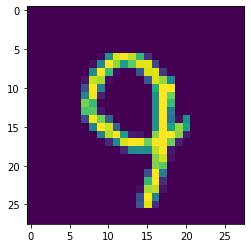

In [52]:
print( np.argmax(predict[999]), y_test[999], )

plt.imshow(x_test[999])